Com base nas aprovações de 2016, oministério da educação precisa que seja previsto as aprovações do ano de 2017

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df = pd.read_excel('/content/C├│pia de aprovacao_alunos (1).xlsx')

In [ ]:
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UF        27 non-null     object
 1   ano_2015  27 non-null     int64 
 2   ano_2016  27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 776.0+ bytes


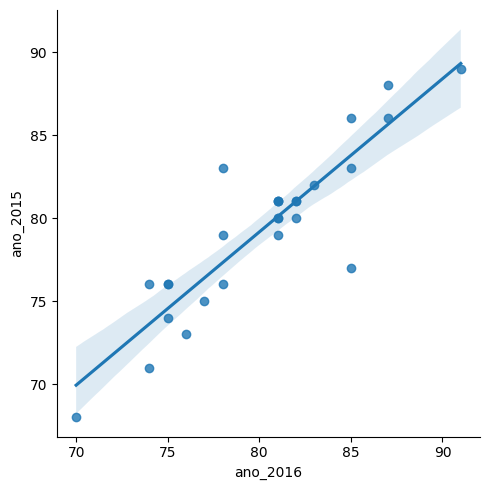

In [ ]:
var_grafico = sns.lmplot(data=df, x='ano_2016', y='ano_2015')


In [ ]:
df.corr()
# É possível ver que sim existe um padrão aqui e que podemos treinar o modelo para realizar as previsões necessárias

<ipython-input-11-7250accd8485>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [22]:
y = df.ano_2016
x= sm.add_constant(df.ano_2015)

In [23]:
previsto = sm.OLS(y,x).fit()

In [24]:
print(previsto.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           3.02e-10
Time:                        20:08:20   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [26]:
df['previsto']= previsto.predict()
df.head()

,UF,ano_2015,ano_2016,previsto_2016,previsto
0,Rondonia,77,85,78.159571,78.159571
1,Acre,79,81,79.895812,79.895812
2,Amazonas,83,85,83.368294,83.368294
3,Roraima,81,82,81.632053,81.632053
4,Para,73,76,74.687089,74.687089
